# Task 1 – Data Analysis & Preprocessing

This notebook covers the first phase of the Week 8–9 KAIM Fraud Detection Challenge.  
We work with two main datasets: e-commerce transaction data (`Fraud_Data.csv`) and bank transaction data (`creditcard.csv`), along with geolocation information (`IpAddress_to_Country.csv`).

> Goal: Prepare clean, enriched, and balanced data for modeling.


In [4]:
# !pip install pandas numpy matplotlib seaborn 

In [7]:
# !pip install scikit-learn

In [14]:
# !pip uninstall scikit-learn imbalanced-learn -y
# !pip install --no-cache-dir scikit-learn imbalanced-learn

In [1]:
# !pip uninstall scikit-learn imbalanced-learn -y
# !pip install --no-cache-dir scikit-learn imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Plotting setup
sns.set(style='whitegrid')
%matplotlib inline

### Load the Datasets

In [2]:
# Load raw datasets
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv")
credit_df = pd.read_csv("../data/raw/creditcard.csv")

# Preview data
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
print("Fraud_Data missing:\n", fraud_df.isnull().sum())
print("IP Data missing:\n", ip_df.isnull().sum())
print("Credit card data missing:\n", credit_df.isnull().sum())

# Example handling (adjust based on what you find)
fraud_df.loc[:, 'age'] = fraud_df['age'].fillna(fraud_df['age'].median())
fraud_df.dropna(inplace=True)

Fraud_Data missing:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
IP Data missing:
 lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Credit card data missing:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
# Remove duplicates
fraud_df.drop_duplicates(inplace=True)

# Convert to datetime
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

fraud_df['ip_address'] = fraud_df['ip_address'].astype('int64')
fraud_df.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int64
class                      int64
dtype: object

### Exploratory Data Analysis (EDA)

We explored the distribution and relationships of key features in the fraud dataset:

##### Key Observations:
- The dataset is **highly imbalanced**, with far more legitimate (class = 0) than fraudulent (class = 1) transactions.
- Some browsers and sources seem more associated with fraud than others.
- Fraudulent transactions often have **slightly lower or more varied purchase values**.
- Age distribution appears skewed, with fraud occurring across all age groups.


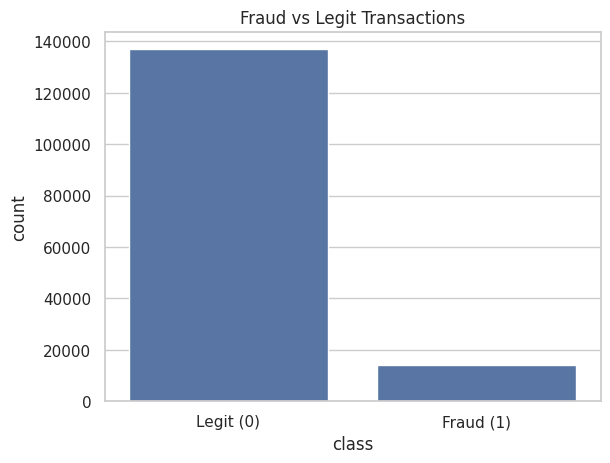

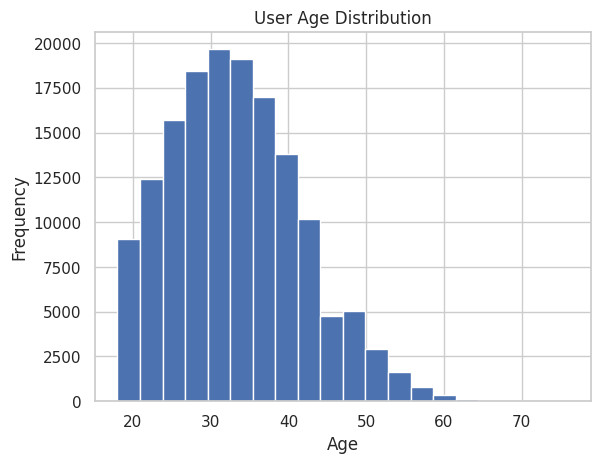

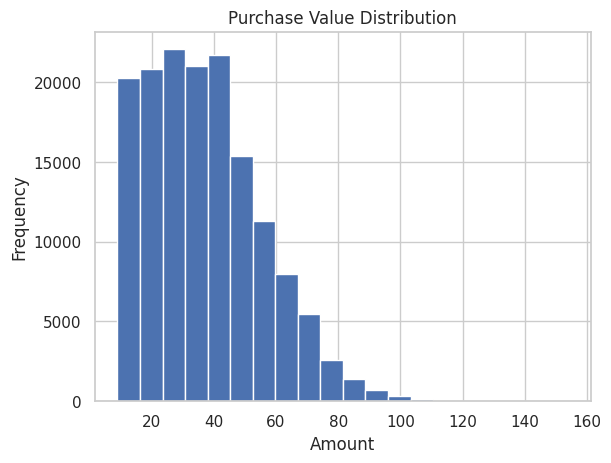

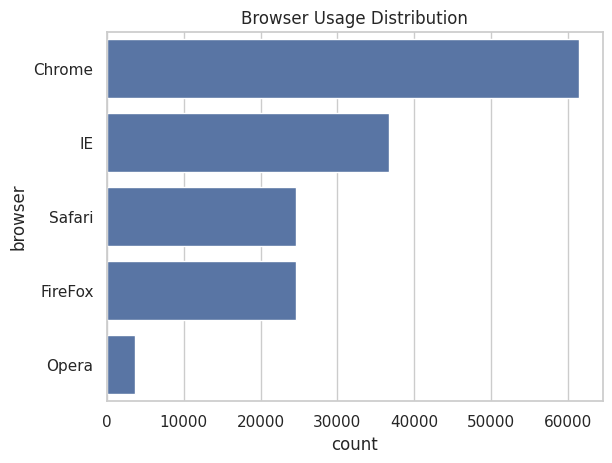

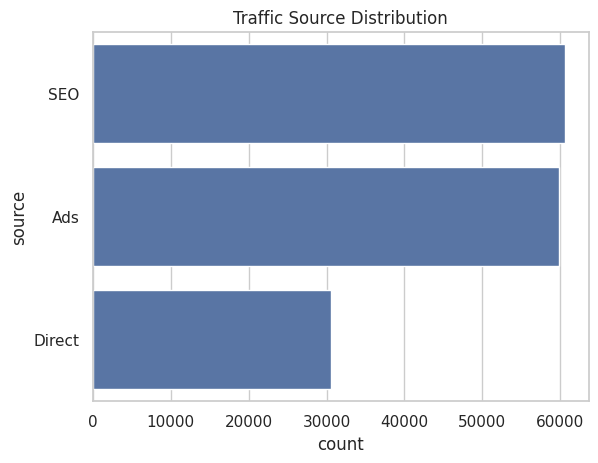

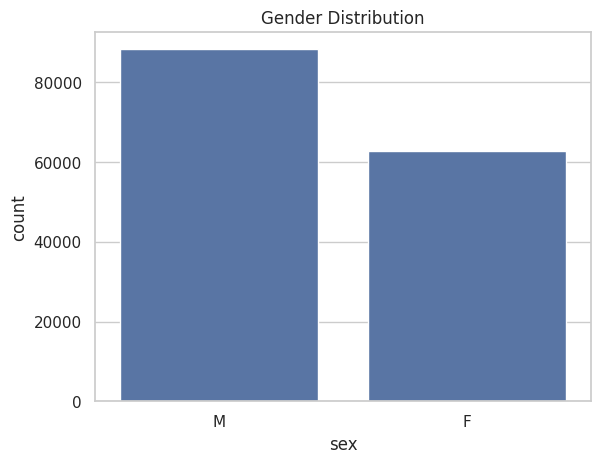

In [5]:
# Class distribution
sns.countplot(data=fraud_df, x='class')
plt.title("Fraud vs Legit Transactions")
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])
plt.savefig("../outputs/figures/class_distribution.png", bbox_inches='tight')
plt.show()

# Age distribution
fraud_df['age'].hist(bins=20)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("../outputs/figures/class_distribution.png", bbox_inches='tight')
plt.show()

# Purchase value
fraud_df['purchase_value'].hist(bins=20)
plt.title("Purchase Value Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.savefig("../outputs/figures/class_distribution.png", bbox_inches='tight')
plt.show()

# Browser distribution
sns.countplot(y='browser', data=fraud_df, order=fraud_df['browser'].value_counts().index)
plt.title("Browser Usage Distribution")
plt.savefig("../outputs/figures/class_distribution.png", bbox_inches='tight')
plt.show()

# Source distribution
sns.countplot(y='source', data=fraud_df, order=fraud_df['source'].value_counts().index)
plt.title("Traffic Source Distribution")
plt.savefig("../outputs/figures/class_distribution.png", bbox_inches='tight')
plt.show()

# Sex distribution
sns.countplot(data=fraud_df, x='sex')
plt.title("Gender Distribution")
plt.savefig("../outputs/figures/class_distribution.png", bbox_inches='tight')
plt.show()

### Bivariate Analysis

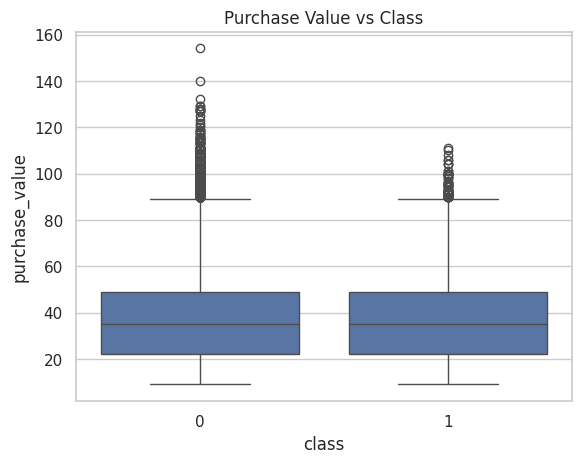

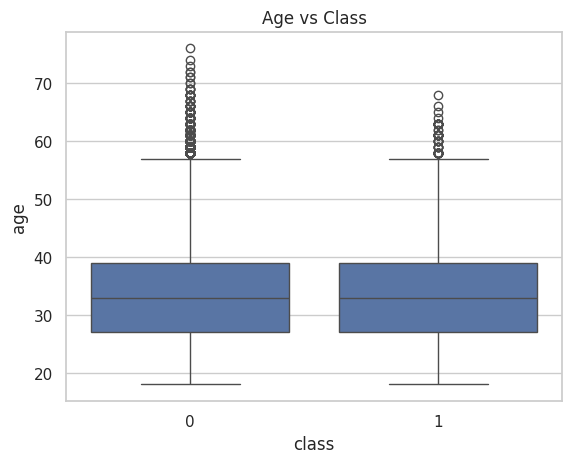

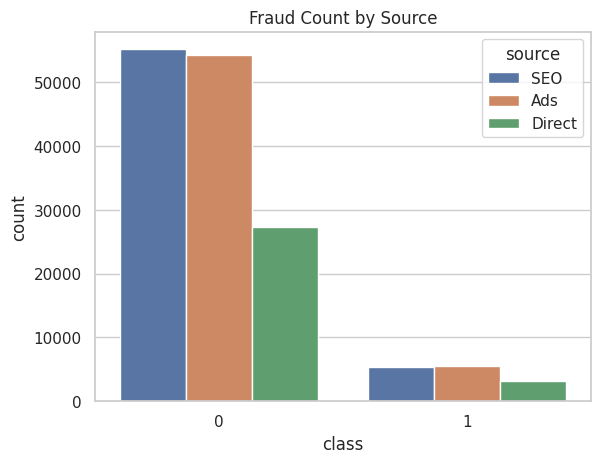

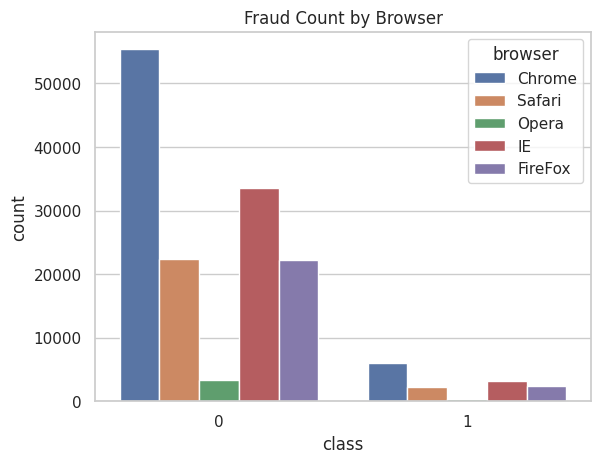

In [6]:
# Purchase value vs class
sns.boxplot(data=fraud_df, x='class', y='purchase_value')
plt.title("Purchase Value vs Class")
plt.savefig("../outputs/figures/purchase_value_vs_class.png", bbox_inches='tight')
plt.show()

# Age vs class
sns.boxplot(data=fraud_df, x='class', y='age')
plt.title("Age vs Class")
plt.savefig("../outputs/figures/age_vs_class.png", bbox_inches='tight')
plt.show()

# Class vs Source
sns.countplot(data=fraud_df, x='class', hue='source')
plt.title("Fraud Count by Source")
plt.savefig("../outputs/figures/fraud_by_source.png", bbox_inches='tight')
plt.show()

# Class vs Browser
sns.countplot(data=fraud_df, x='class', hue='browser')
plt.title("Fraud Count by Browser")
plt.savefig("../outputs/figures/fraud_by_browser.png", bbox_inches='tight')
plt.show()

### IP Address to Country Mapping

We mapped each transaction’s `ip_address` to a corresponding country using the `IpAddress_to_Country.csv` lookup table.

Since the IPs in both datasets were already in integer format, we directly matched them without string conversion. A custom lookup function was used to assign each IP to its country based on IP range.

This added a new feature: `country`

In [7]:
import ipaddress

# Convert IP ranges to int
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype('int64')
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype('int64')

# Create mapping function
def lookup_country(ip, ip_table):
    row = ip_table[(ip_table['lower_bound_ip_address'] <= ip) & (ip_table['upper_bound_ip_address'] >= ip)]
    if not row.empty:
        return row.iloc[0]['country']
    return 'Unknown'

# Map country
fraud_df['country'] = fraud_df['ip_address'].apply(lambda ip: lookup_country(ip, ip_df))

### Feature Engineering

We extracted:
- `hour_of_day` and `day_of_week` from `purchase_time` to capture temporal behavior.
- `time_since_signup` as the number of seconds between `signup_time` and `purchase_time`.
These features help model user behavior and identify suspicious timing patterns.

In [8]:
# Time-based features
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek

# Time since signup in seconds
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds()

# Transaction count per user (velocity)
user_txn_count = fraud_df.groupby('user_id').size().rename('txn_count')
fraud_df = fraud_df.merge(user_txn_count, on='user_id')

### Data Transformation

#### Encode Categorical Variables

In [9]:
# Drop high-cardinality identifiers
X = fraud_df.drop(columns=[
    'class', 'signup_time', 'purchase_time', 'ip_address', 'user_id', 'device_id'
])

# One-hot encode the rest
X = pd.get_dummies(X, drop_first=True)
y = fraud_df['class']

#### Scale Numeric Features

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Train-Test Split + Handle Imbalance with SMOTE

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Check new class balance
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_bal).value_counts().to_dict())


Before SMOTE: {0: 109568, 1: 11321}
After SMOTE: {0: 109568, 1: 109568}


In [13]:
import joblib

joblib.dump(X_train_bal, "../outputs/X_train_bal.pkl")
joblib.dump(y_train_bal, "../outputs/y_train_bal.pkl")
joblib.dump(X_test, "../outputs/X_test.pkl")
joblib.dump(y_test, "../outputs/y_test.pkl")
joblib.dump(scaler, "../outputs/scaler.pkl")
joblib.dump(list(X.columns), "../outputs/feature_names.pkl")

['../outputs/feature_names.pkl']

## SMOTE Oversampling Result

Before applying SMOTE, the training set was highly imbalanced:

- Legitimate: 109,568
- Fraudulent: 11,321

After applying SMOTE, the minority class was synthetically oversampled to match the majority:

- Legitimate: 109,568
- Fraudulent: 109,568

This balanced dataset will improve model performance and prevent bias toward the majority class.
